Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
INPUT_FILE = r'datasets\assignTTSWING.csv'
FULL_OUTPUT_FILE = r'datasets\assignTTSWING_demographic.csv'
SENSOR_ONLY_OUTPUT_FILE = r'datasets\assignTTSWING_sensor_only.csv'

IRRELEVANT_COLS = ['id', 'date', 'testmode', 'teststage', 'fileindex', 'count']
DEMOGRAPHIC_COLS = ['gender', 'age', 'height', 'weight', 'handedness', 'holdRacketHanded']
ORDINAL_MAP = {'low': 0, 'medium': 1, 'high': 2}
OUTLIER_THRESHOLD = 8  # Number of features allowed to be outliers

In [4]:
def load_data(path):
    df = pd.read_csv(path)
    df = df.drop(columns=IRRELEVANT_COLS)
    return df

In [5]:

def encode_features(df):
    df['playYears'] = df['playYears'].map(ORDINAL_MAP)
    return df


def drop_demographics(df):
    return df.drop(columns=DEMOGRAPHIC_COLS)

In [6]:
def remove_outliers(df, exclude_cols=None, threshold=OUTLIER_THRESHOLD):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if exclude_cols:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
    outlier_counts = outlier_mask.sum(axis=1)
    mask = outlier_counts < threshold
    df_clean = df[mask].reset_index(drop=True)
    print(f"Removed {len(df) - len(df_clean)} rows with {threshold} or more outlier features. Remaining rows: {len(df_clean)}")
    return df_clean

In [7]:
def plot_histograms(df, title, exclude_cols=None):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if exclude_cols:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    df[numeric_cols].hist(bins=30, figsize=(20, 15), layout=(len(numeric_cols)//4 + 1, 4))
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:
def plot_class_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='playYears', data=df, palette='viridis')
    plt.title('Class Distribution of playYears')
    plt.xlabel('playYears')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [9]:
def plot_correlation_heatmap(df, title):
    corr_matrix = df.corr()
    plt.figure(figsize=(18, 14))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f",
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.7})
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


In [10]:
def save_data(df, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    df.to_csv(path, index=False)
    print(f"Saved cleaned data to: {path}")

In [11]:
def preprocess_dataset(sensor_only=False):
    df = load_data(INPUT_FILE)
    df = encode_features(df)

    if sensor_only:
        df = drop_demographics(df)

    print("\nMissing values:\n", df.isnull().sum()[df.isnull().sum() > 0])

    df_clean = remove_outliers(df, exclude_cols=['playYears'])

    # Visualization
    title_suffix = "(Sensor-Only)" if sensor_only else "(Full Dataset)"
    plot_histograms(df_clean, f"Histograms of Numeric Features {title_suffix}", exclude_cols=['playYears'])
    plot_class_distribution(df_clean)
    plot_correlation_heatmap(df_clean.select_dtypes(include=['float64', 'int64']), f"Feature Correlation Heatmap {title_suffix}")

    # Save
    output_path = SENSOR_ONLY_OUTPUT_FILE if sensor_only else FULL_OUTPUT_FILE
    save_data(df_clean, output_path)

    return df_clean


Missing values:
 playYears    5
dtype: int64
Removed 10800 rows with 8 or more outlier features. Remaining rows: 86555


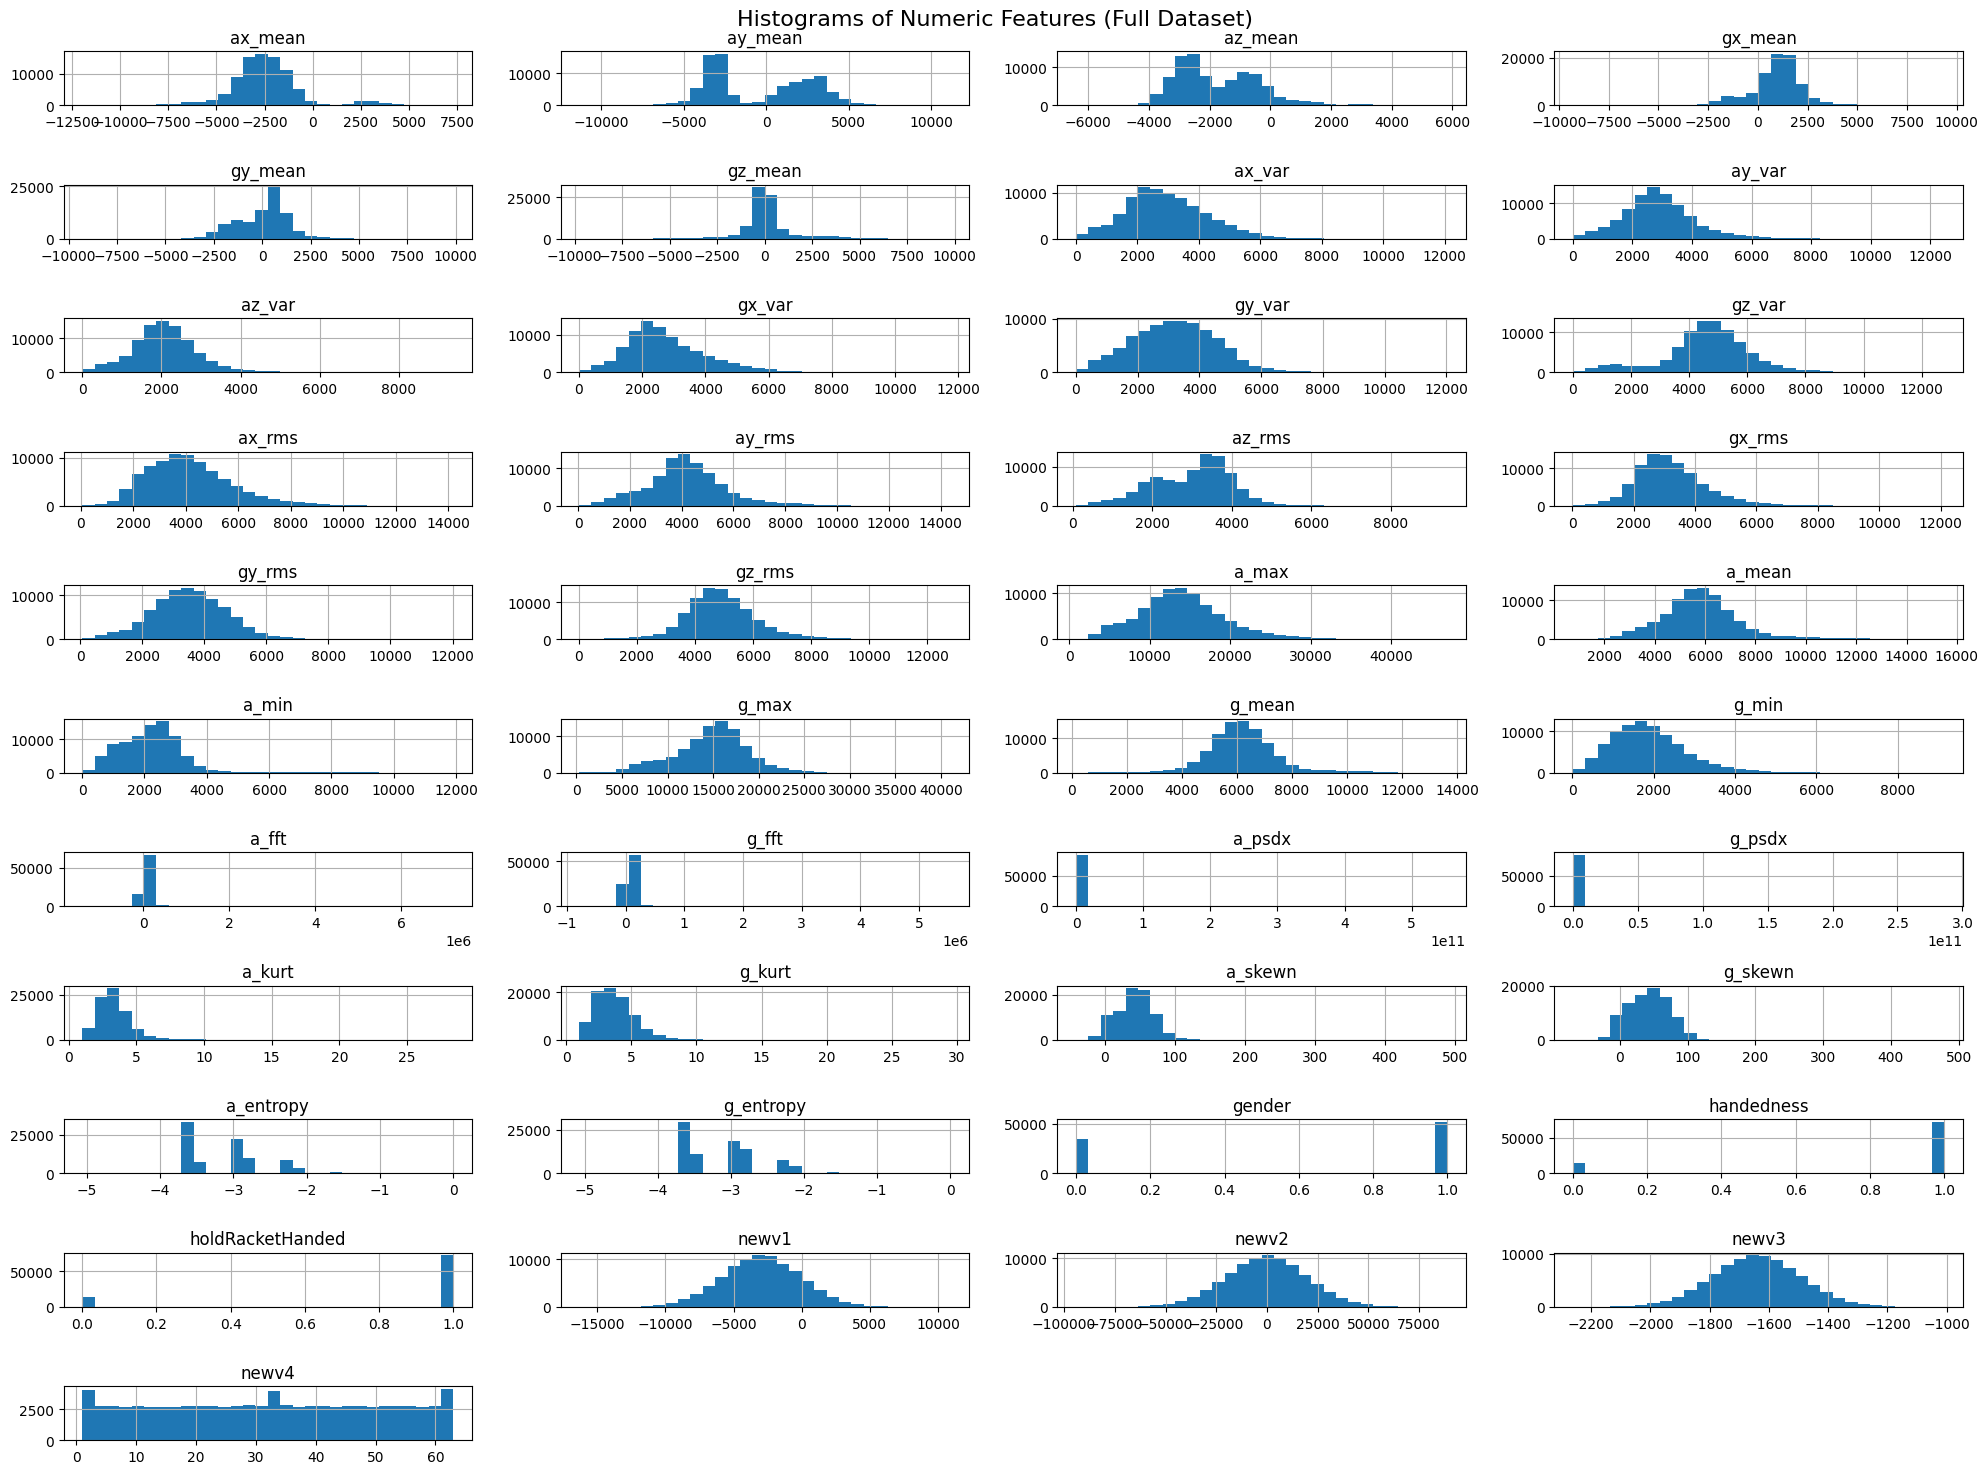

C:\Users\gavin\AppData\Local\Temp\ipykernel_18224\263425048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='playYears', data=df, palette='viridis')


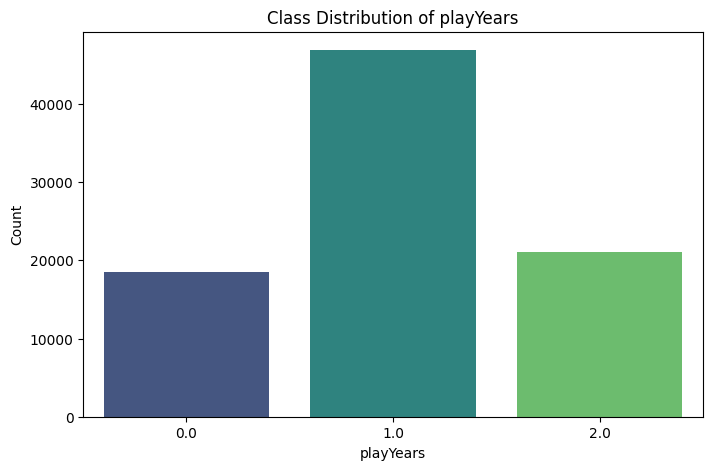

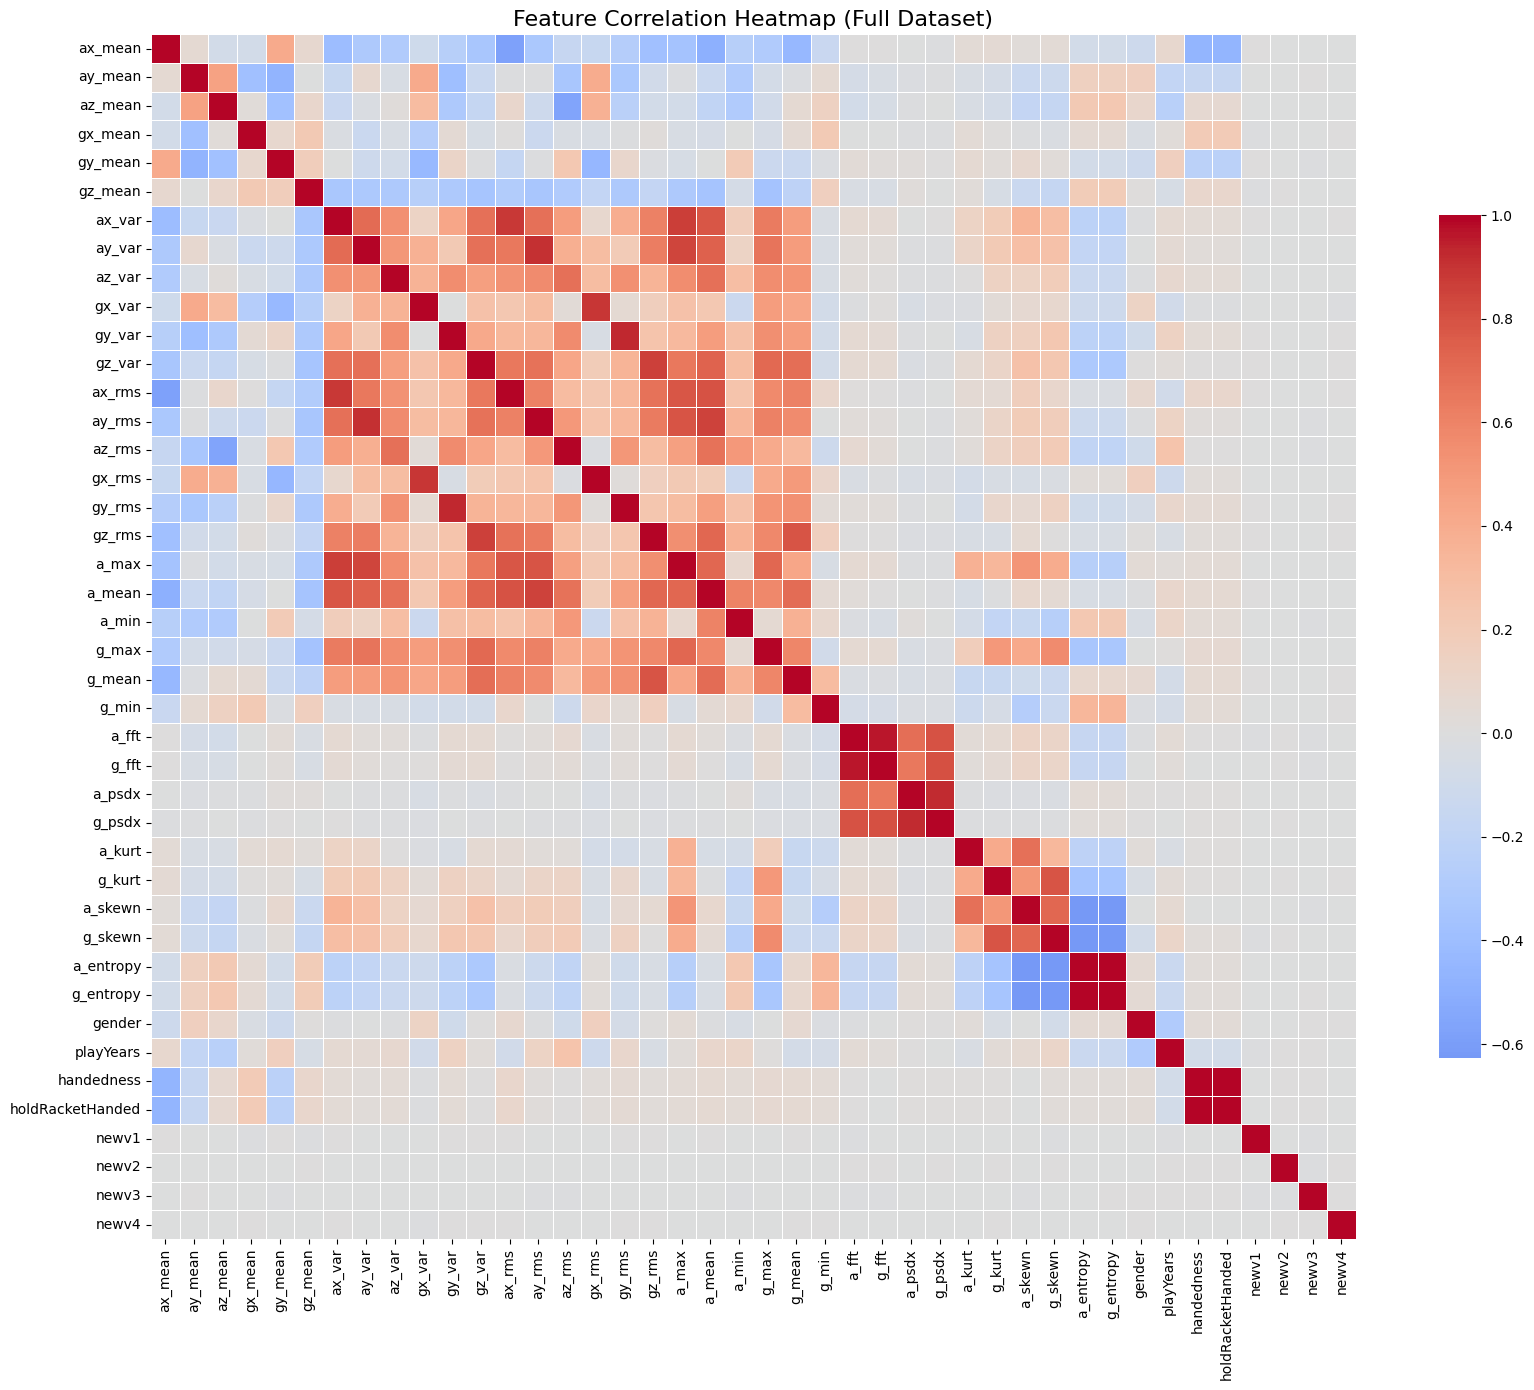

Saved cleaned data to: datasets\assignTTSWING_demographic.csv


,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_var,ay_var,az_var,gx_var,...,age,playYears,height,weight,handedness,holdRacketHanded,newv1,newv2,newv3,newv4
0,-420.058824,-2501.411765,-2608.529412,-891.470588,1924.882353,1917.764706,2365.702245,1853.223077,2295.465482,746.840806,...,high,2.0,high,high,1,1,-1340.472006,-15733.522790,-1544.658523,49
1,-4260.235294,-6815.764706,641.705882,361.352941,636.352941,448.117647,8445.002389,5393.910712,6059.199324,2350.667263,...,high,2.0,high,high,1,1,1699.291015,17999.751190,-1710.420529,39
2,-2148.489362,-4139.319149,-2446.702128,990.978723,1002.872340,-709.957447,3894.657158,3696.751910,1991.912156,1576.206022,...,high,2.0,high,high,1,1,-2415.178434,-7592.651935,-1572.266707,42
3,-1134.382979,-4328.425532,-2315.000000,1373.170213,1501.808511,203.425532,2676.060184,3338.989061,2680.018403,3125.816042,...,high,2.0,high,high,1,1,-818.619048,17088.237950,-1543.260552,55
4,-2101.531915,-3335.468085,-3049.936170,934.063830,300.914894,-1679.808511,3573.486276,3239.843593,1981.631859,1636.071585,...,high,2.0,high,high,1,1,-5071.492703,11651.675570,-1815.121221,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86550,-2209.772727,1184.272727,79.409091,2622.454545,-1293.045455,4194.409091,1099.945822,1584.821217,1241.503987,624.009377,...,high,2.0,low,medium,1,1,-3905.029419,11052.038610,-1466.034289,54
86551,-2513.954545,-543.318182,-1224.136364,2200.636364,-1377.318182,1611.272727,1351.203318,985.600942,1137.915450,2581.752233,...,high,2.0,low,medium,1,1,-1506.342527,-10702.644970,-1697.136205,10
86552,-3063.500000,4361.818182,1296.863636,-1298.772727,1519.818182,1058.181818,3066.712613,4071.646234,3224.048137,5461.056283,...,high,2.0,low,medium,1,1,-1647.398071,-3758.421663,-1592.954238,29
86553,-1038.727273,-27.909091,457.454545,390.500000,-2400.636364,-1437.909091,1118.859248,2229.683139,1642.275160,4239.055778,...,high,2.0,low,medium,1,1,-1477.021970,2608.044800,-1445.734755,9


In [12]:
preprocess_dataset(sensor_only=False)


Missing values:
 playYears    5
dtype: int64
Removed 10254 rows with 8 or more outlier features. Remaining rows: 87101


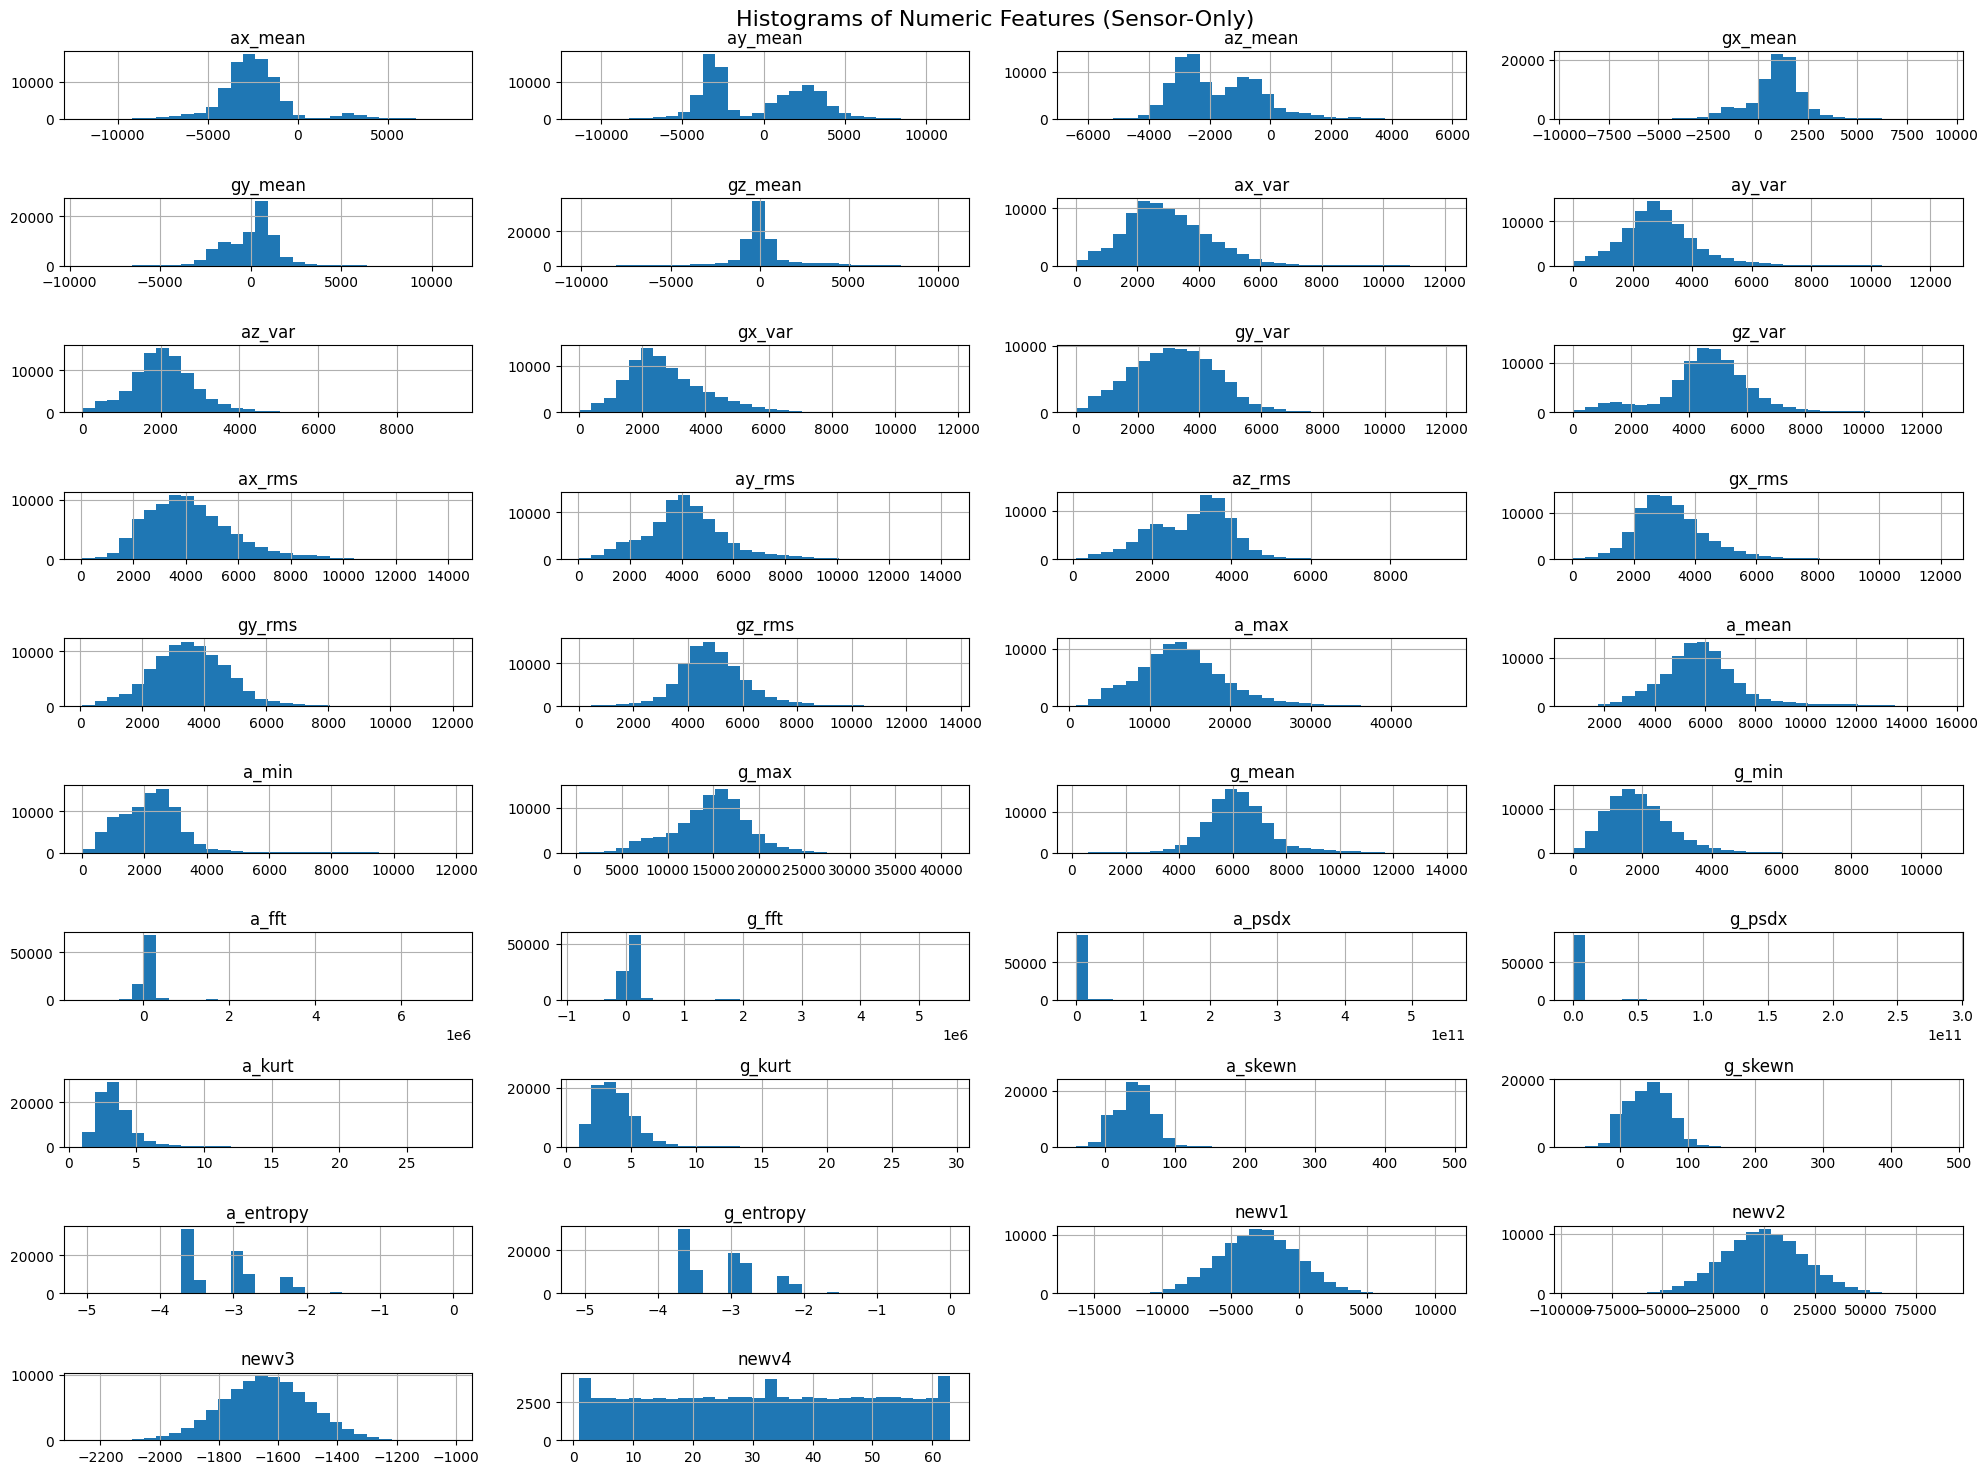

C:\Users\gavin\AppData\Local\Temp\ipykernel_18224\263425048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='playYears', data=df, palette='viridis')


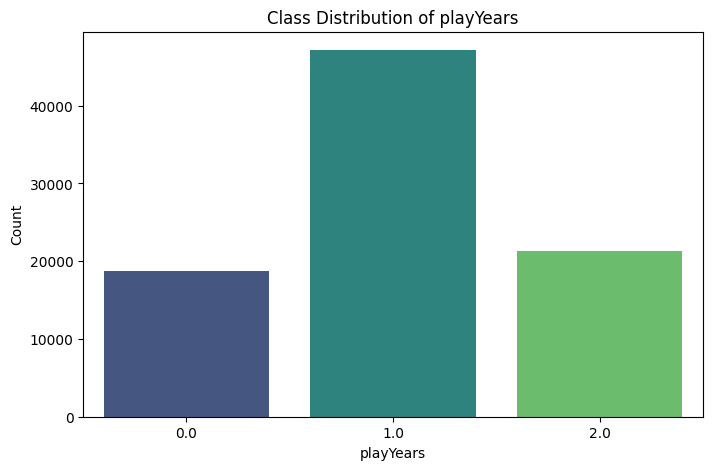

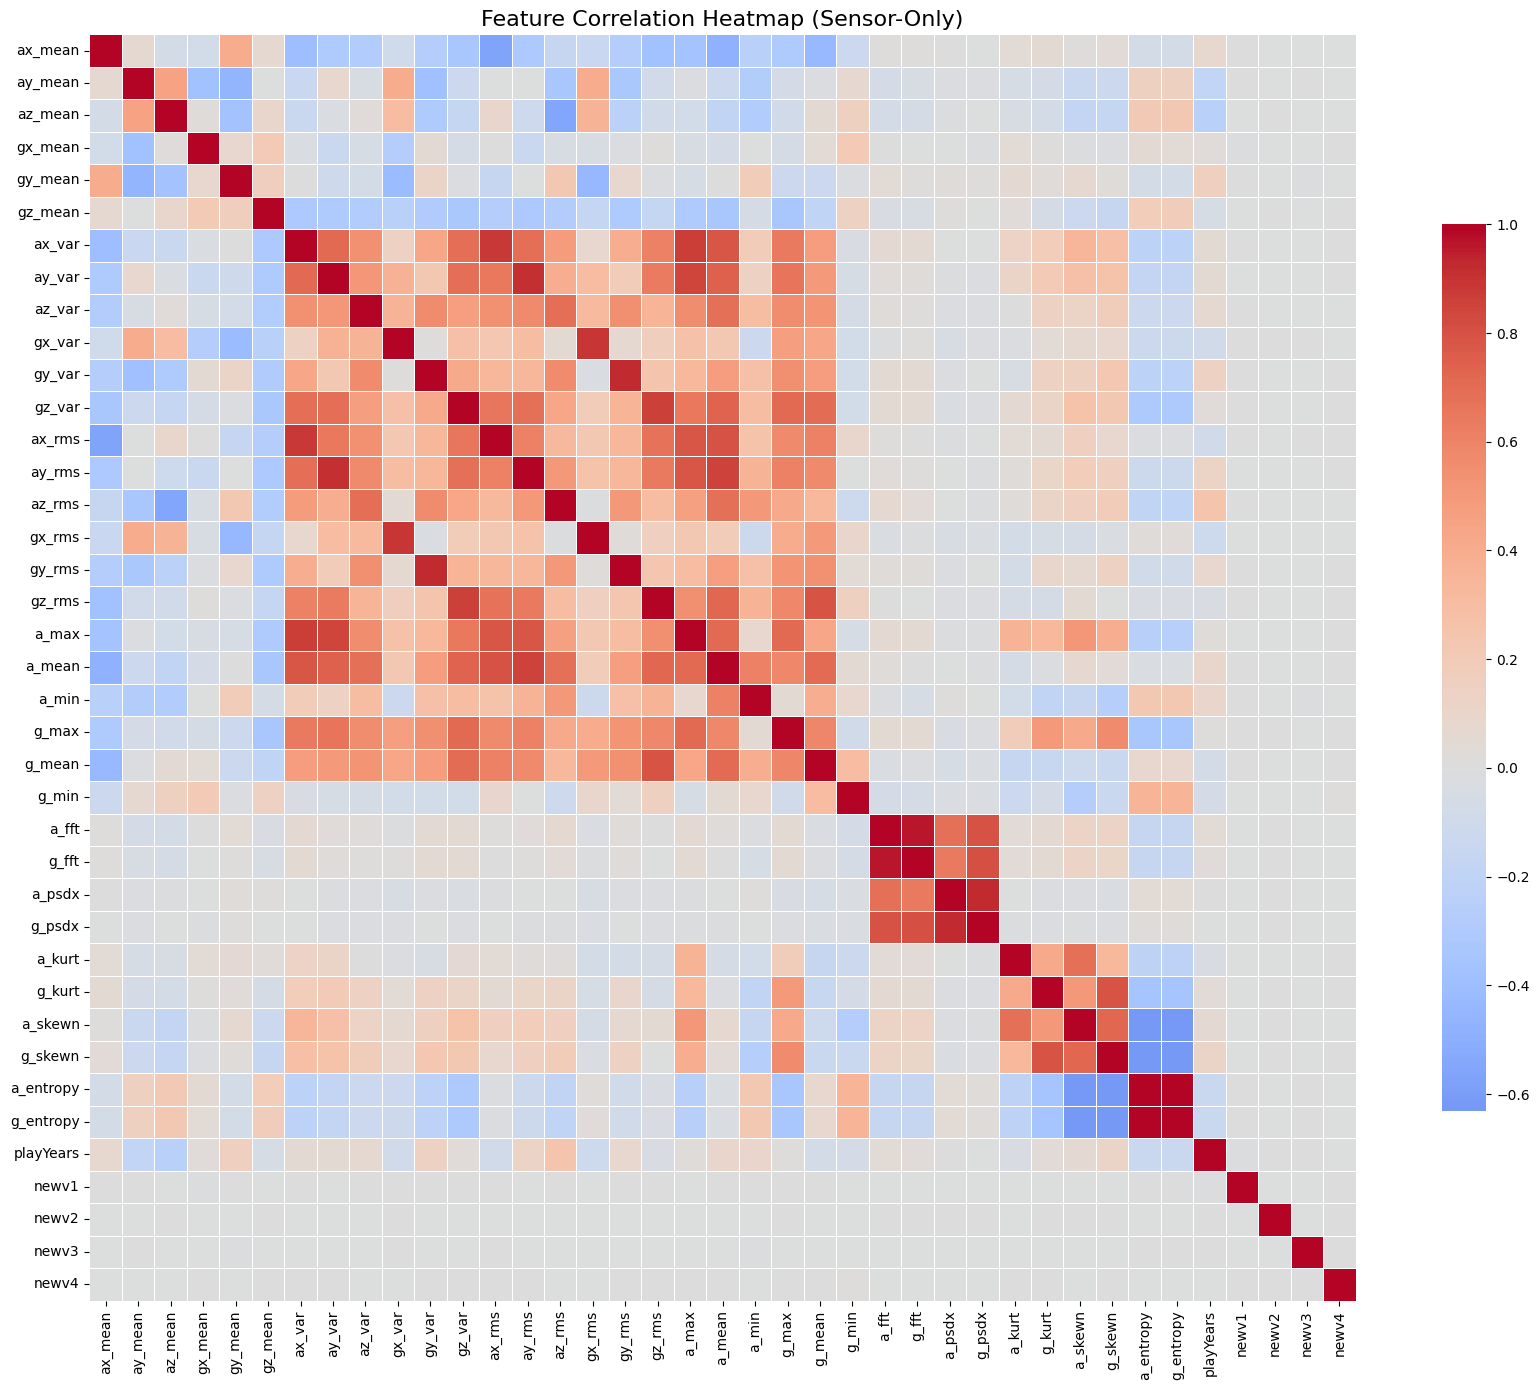

Saved cleaned data to: datasets\assignTTSWING_sensor_only.csv


,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_var,ay_var,az_var,gx_var,...,g_kurt,a_skewn,g_skewn,a_entropy,g_entropy,playYears,newv1,newv2,newv3,newv4
0,-420.058824,-2501.411765,-2608.529412,-891.470588,1924.882353,1917.764706,2365.702245,1853.223077,2295.465482,746.840806,...,1.738620,22.419967,11.667061,-2.213340,-2.204569,2.0,-1340.472006,-15733.522790,-1544.658523,49
1,-4260.235294,-6815.764706,641.705882,361.352941,636.352941,448.117647,8445.002389,5393.910712,6059.199324,2350.667263,...,3.422717,8.911936,12.256528,-2.258010,-2.234974,2.0,1699.291015,17999.751190,-1710.420529,39
2,-2148.489362,-4139.319149,-2446.702128,990.978723,1002.872340,-709.957447,3894.657158,3696.751910,1991.912156,1576.206022,...,4.780415,62.600858,79.623887,-3.530720,-3.533331,2.0,-2415.178434,-7592.651935,-1572.266707,42
3,-1134.382979,-4328.425532,-2315.000000,1373.170213,1501.808511,203.425532,2676.060184,3338.989061,2680.018403,3125.816042,...,4.992752,49.465953,68.891408,-3.571740,-3.567422,2.0,-818.619048,17088.237950,-1543.260552,55
4,-2101.531915,-3335.468085,-3049.936170,934.063830,300.914894,-1679.808511,3573.486276,3239.843593,1981.631859,1636.071585,...,5.243175,63.856115,86.707022,-3.561285,-3.560448,2.0,-5071.492703,11651.675570,-1815.121221,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87096,-2209.772727,1184.272727,79.409091,2622.454545,-1293.045455,4194.409091,1099.945822,1584.821217,1241.503987,624.009377,...,2.585603,6.436371,11.848793,-2.956979,-2.780648,2.0,-3905.029419,11052.038610,-1466.034289,54
87097,-2513.954545,-543.318182,-1224.136364,2200.636364,-1377.318182,1611.272727,1351.203318,985.600942,1137.915450,2581.752233,...,2.430552,19.835969,8.409763,-2.931881,-2.942459,2.0,-1506.342527,-10702.644970,-1697.136205,10
87098,-3063.500000,4361.818182,1296.863636,-1298.772727,1519.818182,1058.181818,3066.712613,4071.646234,3224.048137,5461.056283,...,2.171371,8.603632,11.557400,-2.891568,-2.908791,2.0,-1647.398071,-3758.421663,-1592.954238,29
87099,-1038.727273,-27.909091,457.454545,390.500000,-2400.636364,-1437.909091,1118.859248,2229.683139,1642.275160,4239.055778,...,1.765180,22.593527,-3.189998,-2.906737,-2.930946,2.0,-1477.021970,2608.044800,-1445.734755,9


In [13]:
preprocess_dataset(sensor_only=True)